In [26]:
import pandas as pd
import os
import requests
from acquire import get_items, new_stores, get_stores, get_sales, combined_data, get_germany_power
from prepare import prep_combine, prep_opsd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

Exercises The end result of this exercise should be a file named prepare.py.

Using your store items data:

Convert date column to datetime format.

Plot the distribution of sale_amount and item_price.

Set the index to be the datetime variable.

Add a 'month' and 'day of week' column to your dataframe.

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate 

functions and be able to re-run the functions and get the same results.

In [4]:


# get data using function from acquire
sales = combined_data()

In [5]:
sales.head(2)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ MB


In [7]:
# 1. Convert date column to datetime format.
sales['sale_date'] = pd.to_datetime(sales.sale_date)

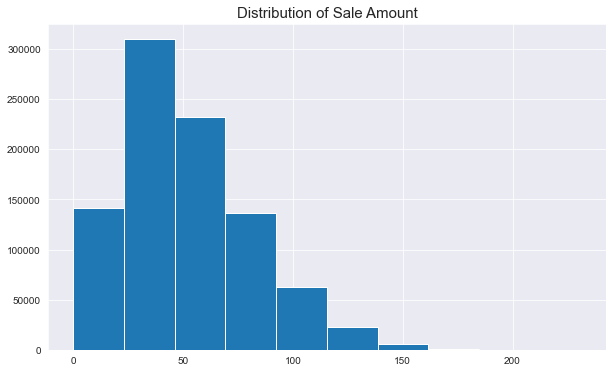

In [8]:
# 2. Plot the distribution of sale_amount and item_price.
plt.hist(x=sales.sale_amount)
plt.title('Distribution of Sale Amount', fontsize = 15)
plt.show()

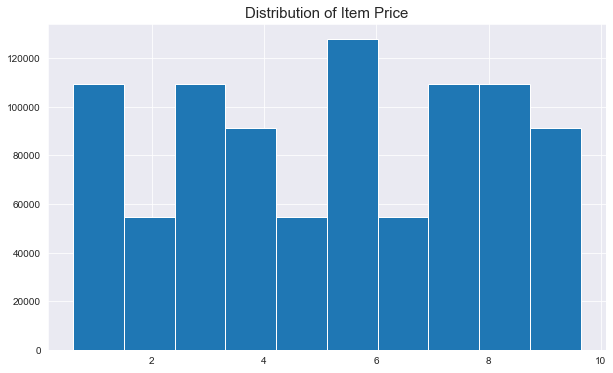

In [9]:
plt.hist(x = sales.item_price)
plt.title('Distribution of Item Price', fontsize = 15)
plt.show()

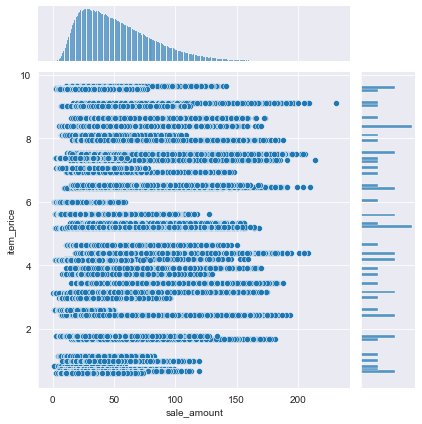

In [10]:
sns.jointplot(data = sales, x = 'sale_amount', y = 'item_price')

In [11]:
# 3. Set the index to be the datetime variable.
sales = sales.set_index('sale_date')

In [12]:
sales.head(2)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [13]:
# 4. Add a 'month' and 'day of week' column to your dataframe.
sales['day_of_week'] = sales.index.day_name()
sales.head(2)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,day_of_week
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Wednesday


In [14]:
sales['month'] = sales.index.month
sales.head(2)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,day_of_week,month
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,1
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Wednesday,1


In [15]:
# 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
sales['sales_total'] = sales.item_price * sales.sale_amount

In [16]:
# 6. Make sure all the work that you have done above is reproducible. 
# That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [17]:
def day_of_week(df):
    '''
    This function takes in a dataframe and returns the dataframe with a column called 
    'day_of_week' attached
    df must have time series index
    '''
    df['day_of_week'] = df.index.day_name()
    
    return df

In [18]:
def add_month(df):
    '''
    This function takes in a dataframe with a time series index
    Returns the dataframe with a new column called 'month' attached
    '''
    df['month'] = df.index.month
    
    return df

In [19]:
def create_sales_total(df):
    '''
    This function takes in the sales df and calculates a new column
    called 'sales_total' from item_price and sale_amount
    '''
    df['sales_total'] = df.item_price * df.sale_amount
    
    return df

In [20]:
def make_datetime_index(df, col_name):
    '''
    This function takes in a dataframe 
    A column name of the column that is your date (as string)
    Performs basic to_datetime conversion and sets tha column as the index
    '''
    
    df[col_name] = pd.to_datetime(df[col_name])

    df = df.set_index(col_name)
    
    return df

In [21]:
# import acquire_func as a 

def prepare_sales_data():
    '''
    This function acquires and prepares the sales dataframe 
    It uses the functions from the acquire module to acquire the data.
    It resets the index to the sale date (giving it a datetime index)
    Adds columns for day_of_week, month, and sales_total
    '''
    
    df = a.get_sales().reset_index()
    
    df = make_datetime_index(df, 'sale_date')
    
    df = day_of_week(df)
    
    df = add_month(df)
    
    df = create_sales_total(df)
    
    return df

In [29]:
# test the function
df = prep_combine(df)

In [31]:
# IT WORKS! 
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00



Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

Convert date column to datetime format.

Plot the distribution of each of your variables.

Set the index to be the datetime variable.

Add a month and a year column to your dataframe.

Fill any missing values.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate 

functions and be able to re-run the functions and get the same results.

In [32]:
# get data and reaname wind and solar column in case i have to restart the kernel
df_ger = get_germany_power()
df_ger.rename(columns = {'Wind+Solar': 'wind_and_solar'}, inplace=True)

In [33]:
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4383 non-null   int64  
 1   Date            4383 non-null   object 
 2   Consumption     4383 non-null   float64
 3   Wind            2920 non-null   float64
 4   Solar           2188 non-null   float64
 5   wind_and_solar  2187 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 205.6+ KB


In [34]:
# 1. Convert date column to datetime format.
df_ger['Date'] = pd.to_datetime(df_ger['Date'])

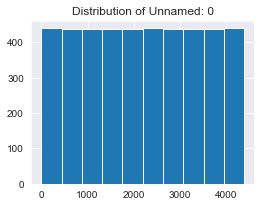

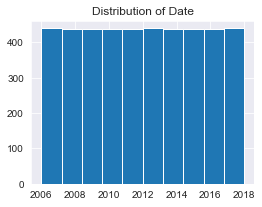

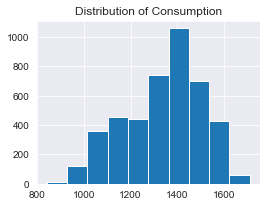

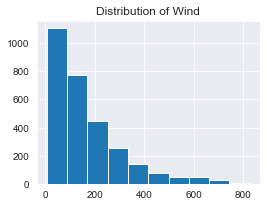

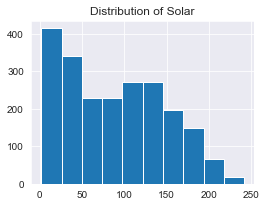

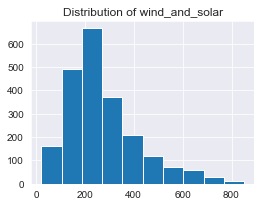

In [35]:
# 2. Plot the distribution of each of your variables.
for col in list(df_ger):
    plt.figure(figsize = (4,3))
    plt.hist(data = df_ger, x = col)
    plt.title(f'Distribution of {col}')
    plt.show()

In [36]:
# 3. Set the index to be the datetime variable.
df_ger = df_ger.set_index('Date')

In [37]:
# 4. Add a month and a year column to your dataframe.

# add month using month function from above
df_ger = add_month(df_ger)

In [38]:
# add year (will turn into a function)
df_ger['year'] = df_ger.index.year

In [39]:
# 5. Fill any missing values.

In [40]:
# put missing mvalues table here and put in wrangle or prepare or explore or something
def missing_values_table(df):
    '''
    this function takes a dataframe as input and will output metrics for missing values, 
    and the percent of that column that has missing values
    '''
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
        
        # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [41]:
# look at missing values
missing_values_table(df_ger)

Your selected dataframe has 7 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
wind_and_solar,2196,50.1
Solar,2195,50.1
Wind,1463,33.4


In [42]:
df_ger.resample('Y').agg('sum')

,Unnamed: 0,Consumption,Wind,Solar,wind_and_solar,month,year
Date,,,,,,,
2006-12-31,66430,489068.53600,0.000,0.000,0.000,2382,732190
2007-12-31,199655,496631.84700,0.000,0.000,0.000,2382,732555
2008-12-31,333975,495570.87600,0.000,0.000,0.000,2384,734928
2009-12-31,466470,459737.42800,0.000,0.000,0.000,2382,733285
2010-12-31,599695,488588.70000,35911.777,0.000,0.000,2382,733650
2011-12-31,732920,484814.08600,44032.951,0.000,0.000,2382,734015
2012-12-31,868701,469574.75400,45862.667,27887.332,73749.999,2384,736392
2013-12-31,999735,463336.85300,47197.832,29559.780,76697.443,2382,734745
2014-12-31,1132960,504164.82100,51107.672,32498.307,83370.502,2382,735110


In [43]:
# fill na's with 0s 
df_ger = df_ger.fillna(value = 0)

In [44]:
# 6. Make sure all the work that you have done above is reproducible. 
# That is, you should put the code above into separate functions 
# and be able to re-run the functions and get the same results.

In [45]:
def add_year(df):
    '''
    This function takes in a dataframe with a time series index
    Returns the dataframe with a new column called 'year' attached
    '''
    df['year'] = df.index.year
    
    return df

In [46]:
def prep_germany_data():
    '''
    '''
    df = a.get_germany_power()
    
    #rename wind+solar for ease of use
    df = df.rename(columns = {'Wind+Solar': 'wind_and_solar'})
    
    df = make_datetime_index(df, 'Date')
    
    df = add_month(df)
    
    df = add_year(df)
    
    # fill NaNs with 0s
    df = df.fillna(value = 0)
    
    return df

In [47]:
# test functions
df_tester = prep_germany_data()

Conclusion

All the functions here have been moved to the prepare.py file located in this repo

Acquire function to use is called acquire_func.py

This is because the acquire.py file originally also has work from the codeup exercises in it.